<a href="https://www.kaggle.com/code/sdysch/tps-july-2022-gaussian-mixture?scriptVersionId=100417596" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

* See also:
    * https://github.com/sdysch/kaggle/blob/master/tps-july-2022.ipynb
    * https://www.kaggle.com/code/sdysch/tps-july-2022


In [2]:
plt.style.use('seaborn')

In [3]:
data = pd.read_csv('../input/tabular-playground-series-jul-2022/data.csv', index_col='id')

# Standardize distributions

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[data.columns] = scaler.fit_transform(data[data.columns])

# Dimensionality reduction

In [5]:
from sklearn.decomposition import PCA
N_COMPONENTS = data.shape[1]
pca = PCA(n_components=N_COMPONENTS)
data_red = pca.fit_transform(data[data.columns])

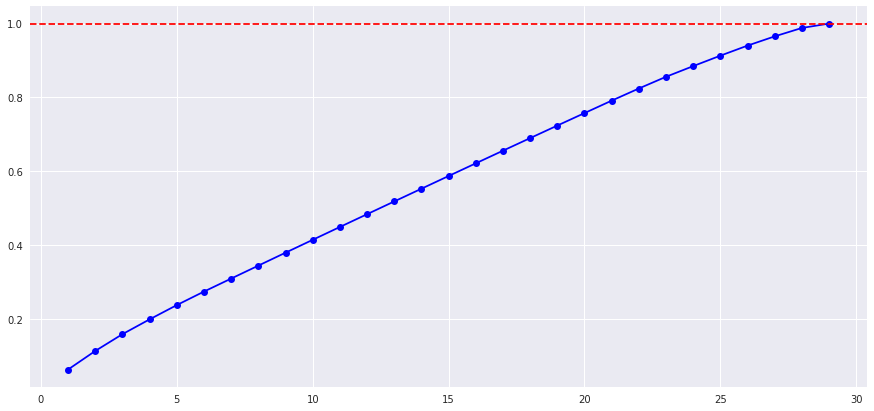

In [6]:
# plot cumulative explained variance ratio against n_components
fig, ax = plt.subplots(figsize=(15, 7))
cumulative_sum = np.cumsum(pca.explained_variance_ratio_)
ax.plot(range(1, 1 + len(cumulative_sum)), cumulative_sum, marker='o', linestyle='-', color='b')
ax.axhline(y=1, color='r', linestyle='dashed')

In [7]:
N_COMPONENTS = 25
pca = PCA(n_components=N_COMPONENTS)
data_red = pca.fit_transform(data[data.columns])
data_red

array([[-7.19058135e-01, -1.84284477e-02, -1.01489775e+00, ...,
        -2.52555199e-01, -6.96924942e-01, -2.83092471e-01],
       [-1.01209813e+00, -9.20653984e-01,  1.88684735e+00, ...,
        -7.53800067e-01, -1.16834368e+00, -2.88820943e-01],
       [-1.37061505e+00,  5.85541813e-01, -1.25720259e+00, ...,
         1.43349535e+00,  1.26014329e+00, -2.24548162e+00],
       ...,
       [ 5.27246160e-01, -6.92976846e-01, -1.41440532e+00, ...,
        -4.05755467e-03, -1.17398039e+00,  1.32667018e+00],
       [ 5.87352923e-01, -1.18654312e+00, -1.25014778e-03, ...,
         5.65345202e-02, -7.47469726e-01, -2.76966073e-01],
       [-1.67504885e+00, -5.86344582e-01,  3.84392187e-02, ...,
        -9.98118577e-01, -8.52724856e-01, -1.27040866e-01]])

# Deciding number of components

In [8]:
SEED = 42
CLUSTERS = 20
from sklearn.mixture import GaussianMixture
clusters, bics = list(), list()
for cluster in range(2, CLUSTERS):
    print(f'Components: {cluster}')
    model = GaussianMixture(n_components=cluster, random_state=SEED)
    model.fit(data_red)
    bics.append(model.bic(data_red))
    clusters.append(cluster)

Components: 2
Components: 3
Components: 4
Components: 5
Components: 6
Components: 7
Components: 8
Components: 9
Components: 10
Components: 11
Components: 12
Components: 13
Components: 14
Components: 15
Components: 16
Components: 17
Components: 18
Components: 19


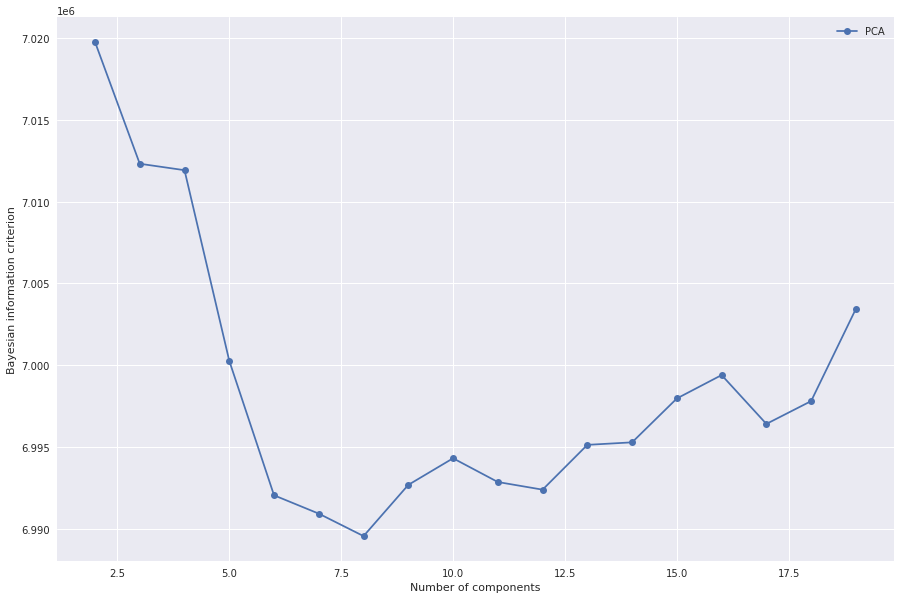

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
ax.plot(clusters, bics, marker='o', label='PCA')
ax.set_xlabel('Number of components')
ax.set_ylabel('Bayesian information criterion')
ax.legend(loc='best')
fig.show()

In [10]:
from sklearn.mixture import GaussianMixture
model = GaussianMixture(n_components=8)
model.fit(data_red)
pred = model.predict(data_red)

# Visualise clusters in different projections

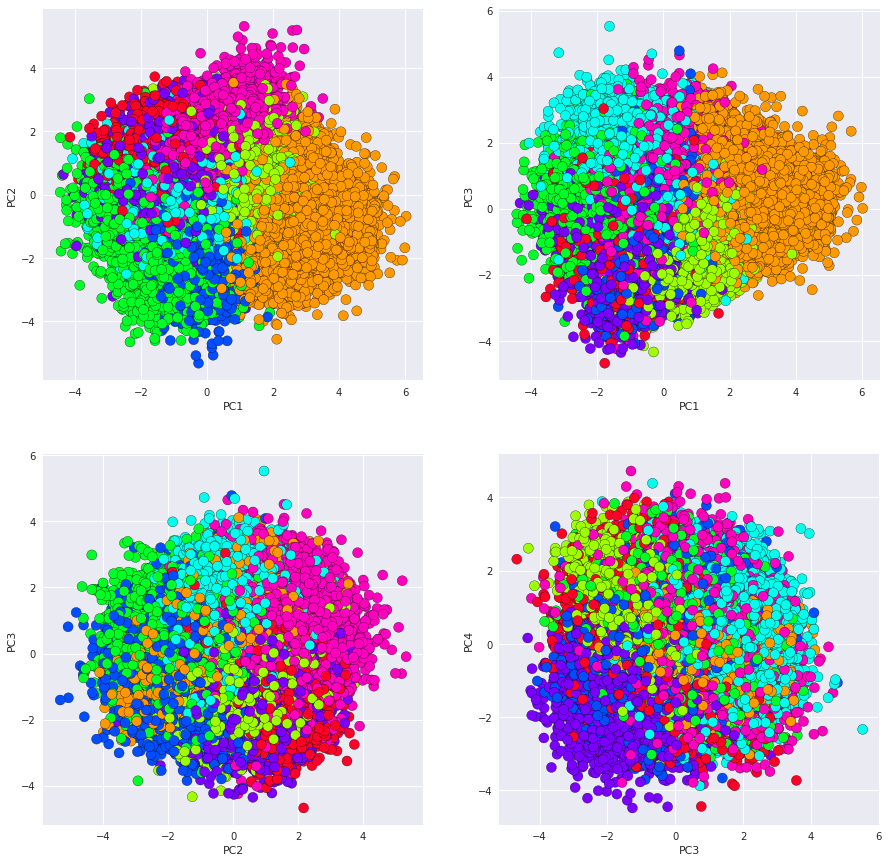

In [11]:
# plot features, colour by class
s = 100
fig, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0, 0].scatter(data_red[:, 0], data_red[:, 1], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[0, 0].set_xlabel('PC1')
ax[0, 0].set_ylabel('PC2')

ax[0, 1].scatter(data_red[:, 0], data_red[:, 2], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[0, 1].set_xlabel('PC1')
ax[0, 1].set_ylabel('PC3')

ax[1, 0].scatter(data_red[:, 1], data_red[:, 2], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[1, 0].set_xlabel('PC2')
ax[1, 0].set_ylabel('PC3')

ax[1, 1].scatter(data_red[:, 2], data_red[:, 3], c=pred, cmap='gist_rainbow', edgecolor='k', s=s)
ax[1, 1].set_xlabel('PC3')
ax[1, 1].set_ylabel('PC4')

fig.show()

# Submission

In [12]:
submission = pd.read_csv('../input/tabular-playground-series-jul-2022/sample_submission.csv')
submission.head()
submission["Predicted"] = pred
submission.to_csv('submission.csv', index=False)
submission.head()

,Id,Predicted
0,0,6
1,1,4
2,2,0
3,3,2
4,4,7
